In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
titanic_data = pd.read_csv('tested.csv')

In [10]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Correlation Heatmap

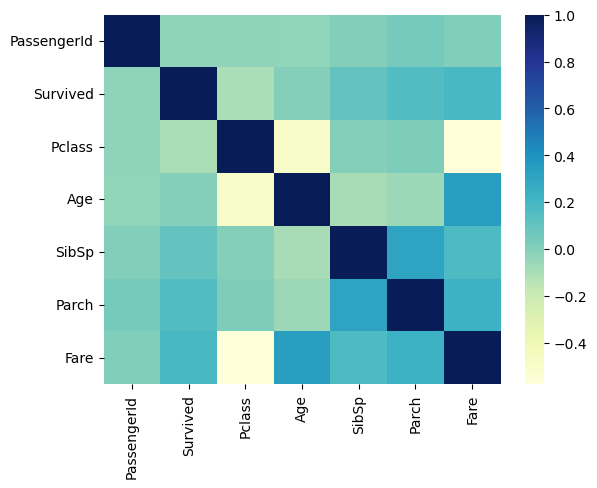

In [12]:
import seaborn as sns
sns.heatmap(titanic_data.corr(),cmap='YlGnBu')
plt.show()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2) #only one split and test_size is 20%
for train_indices, test_indices  in split.split(titanic_data, titanic_data[['Survived','Pclass','Sex']]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

In [14]:
strat_test_set


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
210,1102,0,3,"Andersen, Mr. Albert Karvin",male,32.00,0,0,C 4001,22.5250,NaN,S
68,960,0,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.00,0,0,2543,28.5375,C53,C
357,1249,0,3,"Lockyer, Mr. Edward",male,NaN,0,0,1222,7.8792,NaN,S
112,1004,1,1,"Evans, Miss. Edith Corse",female,36.00,0,0,PC 17531,31.6792,A29,C
199,1091,1,3,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",female,NaN,0,0,65305,8.1125,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
27,919,0,3,"Daher, Mr. Shedid",male,22.50,0,0,2698,7.2250,NaN,C
301,1193,0,2,"Malachard, Mr. Noel",male,NaN,0,0,237735,15.0458,D,C
348,1240,0,2,"Giles, Mr. Ralph",male,24.00,0,0,248726,13.5000,NaN,S


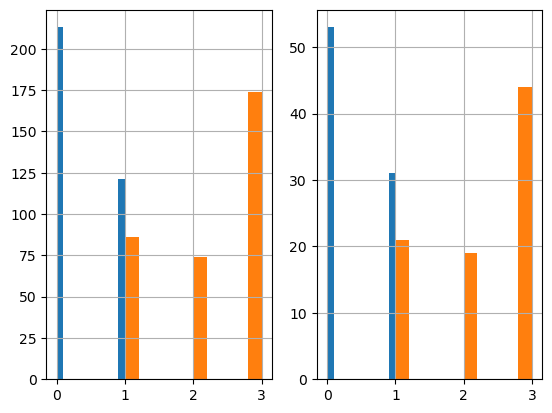

In [15]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [16]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 123 to 38
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  334 non-null    int64  
 1   Survived     334 non-null    int64  
 2   Pclass       334 non-null    int64  
 3   Name         334 non-null    object 
 4   Sex          334 non-null    object 
 5   Age          265 non-null    float64
 6   SibSp        334 non-null    int64  
 7   Parch        334 non-null    int64  
 8   Ticket       334 non-null    object 
 9   Fare         333 non-null    float64
 10  Cabin        72 non-null     object 
 11  Embarked     334 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 33.9+ KB


## Estimators

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy = "mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [18]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ['C','S','Q','N']
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ['Female', 'Male']
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X    
        

In [19]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1, errors='ignore')

In [20]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                    ("featureencoder",FeatureEncoder()),
                    ("featuredropper",FeatureDropper())])

In [21]:
strat_train_set = pipeline.fit_transform(strat_train_set)
# strat_train_set = pipeline.transform(strat_train_set)
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
123,1015,0,3,28.000000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
350,1242,1,1,45.000000,0,1,63.3583,1.0,0.0,0.0,1.0,0.0
82,974,0,1,49.000000,0,0,26.0000,0.0,0.0,1.0,0.0,1.0
122,1014,1,1,35.000000,1,0,57.7500,1.0,0.0,0.0,1.0,0.0
35,927,0,3,18.500000,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
282,1174,1,3,30.407245,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
147,1039,0,3,22.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
46,938,0,1,45.000000,0,0,29.7000,1.0,0.0,0.0,0.0,1.0
415,1307,0,3,38.500000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0


In [22]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 123 to 38
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  334 non-null    int64  
 1   Survived     334 non-null    int64  
 2   Pclass       334 non-null    int64  
 3   Age          334 non-null    float64
 4   SibSp        334 non-null    int64  
 5   Parch        334 non-null    int64  
 6   Fare         333 non-null    float64
 7   C            334 non-null    float64
 8   S            334 non-null    float64
 9   Q            334 non-null    float64
 10  Female       334 non-null    float64
 11  Male         334 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 33.9 KB


In [39]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'],axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [17]:
# X_data #now we have dataset as numpy array

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10,100,200,500], "max_depth": [None,5,10],"min_samples_split": [2,3,4]}   
]

grid_search = GridSearchCV(clf,param_gird, cv = 3, scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,y_data)

In [19]:
final_clf = grid_search.best_estimator_

In [20]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200)

In [21]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [22]:
X_test = strat_test_set.drop(['Survived'],axis=1)
y_test = strat_test_set['Survived']

scaler=StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [23]:
final_clf.score(X_data_test,y_data_test)

0.8156424581005587

In [24]:
final_data = pipeline.fit_transform(titanic_data)

In [25]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_final = final_data.drop(['Survived'],axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [ ]:
prod_clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10,100,200,500], "max_depth": [None,5,10],"min_samples_split": [2,3,4]}   
]

grid_search = GridSearchCV(prod_clf,param_gird, cv = 3, scoring="accuracy",return_train_score=True)
grid_search.fit(X_data_final,y_data_final)


In [ ]:
prod_final_clf = grid_search.best_estimator_

In [ ]:
prod_final_clf

In [30]:
titanic_test_data = pd.read_csv("test.csv")

In [31]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [32]:
final_test_data.info()  #we can see we have a Null Value in 'Fare'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [33]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test= scaler.fit_transform(X_final_test)

In [34]:
predictions = prod_final_clf.predict(X_data_final_test)

In [35]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions.csv",index=False)

In [38]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
